In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


#Kaggle API

In [2]:
!pip install kaggle

In [3]:
# jsonファイルをコピーして作業スペースに持ってくる
!cp /content/drive/MyDrive/tool/key/kaggle.json /content/

# root下に移動
!mkdir -p ~/.kaggle         # -p: 親ディレクトリも含めて作成
!mv kaggle.json ~/.kaggle/

# ダウンロード
!chmod 600 /root/.kaggle/kaggle.json        # 600: 所有者のみ読み書き可能
!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

  0% 0.00/111k [00:00<?, ?B/s]
100% 111k/111k [00:00<00:00, 33.1MB/s]
 98% 266M/271M [00:02<00:00, 91.2MB/s]
100% 271M/271M [00:02<00:00, 99.9MB/s]
 98% 533M/544M [00:04<00:00, 162MB/s]
100% 544M/544M [00:04<00:00, 131MB/s]


In [4]:
# 展開
!mkdir datasets
!unzip /content/test.zip -d "/content/datasets"
!unzip /content/train.zip -d "/content/datasets"

ストリーミング出力は最後の 5000 行に切り捨てられました。
  inflating: /content/datasets/train/dog.5499.jpg  
  inflating: /content/datasets/train/dog.55.jpg  
  inflating: /content/datasets/train/dog.550.jpg  
  inflating: /content/datasets/train/dog.5500.jpg  
  inflating: /content/datasets/train/dog.5501.jpg  
  inflating: /content/datasets/train/dog.5502.jpg  
  inflating: /content/datasets/train/dog.5503.jpg  
  inflating: /content/datasets/train/dog.5504.jpg  
  inflating: /content/datasets/train/dog.5505.jpg  
  inflating: /content/datasets/train/dog.5506.jpg  
  inflating: /content/datasets/train/dog.5507.jpg  
  inflating: /content/datasets/train/dog.5508.jpg  
  inflating: /content/datasets/train/dog.5509.jpg  
  inflating: /content/datasets/train/dog.551.jpg  
  inflating: /content/datasets/train/dog.5510.jpg  
  inflating: /content/datasets/train/dog.5511.jpg  
  inflating: /content/datasets/train/dog.5512.jpg  
  inflating: /content/datasets/train/dog.5513.jpg  
  inflating: /content/datasets/train

#import

In [5]:
import glob, shutil, cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#データ確認

In [6]:
# train
path = sorted(glob.glob("/content/datasets/train/*"))
label = [int('dog' in path[i]) for i in range(len(path))] # dog: 1, cat: 0

train = pd.DataFrame(path, columns=["path"])
train["label"] = label

print("train-dfのsize:", train.shape)

train.sample(5)

train-dfのsize: (25000, 2)


,path,label
17705,/content/datasets/train/dog.3432.jpg,1
1552,/content/datasets/train/cat.11394.jpg,0
13217,/content/datasets/train/dog.10642.jpg,1
23310,/content/datasets/train/dog.8478.jpg,1
20663,/content/datasets/train/dog.6095.jpg,1


In [9]:
# test
path = sorted(glob.glob("/content/datasets/test/*"))
test = pd.DataFrame(path, columns=["path"])

print("test-dfのsize:", test.shape)

test.tail()

test-dfのsize: (12500, 1)


,path
12495,/content/datasets/test/9995.jpg
12496,/content/datasets/test/9996.jpg
12497,/content/datasets/test/9997.jpg
12498,/content/datasets/test/9998.jpg
12499,/content/datasets/test/9999.jpg


画像サイズ: (483, 313, 3)
ラベル: 0


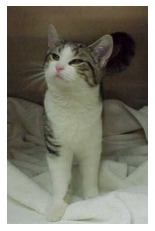

In [ ]:
# 画像確認
i = np.random.randint(0, len(train))
img = cv2.imread(train["path"].iloc[i])

print("画像サイズ:", img.shape)
print("ラベル:", train["label"].iloc[i])

plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

#画像加工

In [ ]:
# resize等処理をして別ディレクトリに保存
from pathlib import Path
from tqdm.notebook import tqdm

class ResizeImg:
    def __init__(self, size=512):
        self.size = size

    def read_img(self, path):
        img = cv2.imread(path)
        img = img - np.min(img)                         # min-max normalization
        img = img / np.max(img)
        img = (img * 255).astype(np.uint8)              # 0-255値に変換
        return img 
        
    def resize_img(self, img):
        img = cv2.resize(img , (self.size, self.size))  # resize
        return img

    def __call__(self, path, ROOT):
        img = self.read_img(path)                       # 読み込み
        img = self.resize_img(img)                      # resize

        filename = path.split("/")[-1][:-4]             # pathの末尾、ファイル名だけを取り出し ([:-4] .jpgを除く)

        savepath = ROOT + f"{filename}.jpg"
        Path(savepath).parent.mkdir(exist_ok=True, parents=True)
        cv2.imwrite(savepath, img)

        return img


img_size = 128
func = ResizeImg(size=img_size)

# 2分くらい
save_root = "/content/datasets/train_resize_" + str(img_size) + "/"

for path in tqdm(train["path"].values):
    func(path, save_root)

# 2分くらい
save_root = "/content/datasets/test_resize_" + str(img_size) + "/"

for path in tqdm(test["path"].values):
    func(path, save_root)

  0%|          | 0/25000 [00:00<?, ?it/s]

  0%|          | 0/12500 [00:00<?, ?it/s]

In [ ]:
# 雑に確認
print(len(glob.glob("/content/datasets/train_resize_128/*")))
print(len(glob.glob("/content/datasets/test_resize_128/*")))

25000
12500


#driveに保存

In [ ]:
%cd /content/datasets/

/content/datasets


In [ ]:
!zip -r train_resize_128 train_resize_128
!zip -r test_resize_128 test_resize_128

ストリーミング出力は最後の 5000 行に切り捨てられました。
  adding: test_resize_128/969.jpg (deflated 2%)
  adding: test_resize_128/11215.jpg (deflated 2%)
  adding: test_resize_128/11006.jpg (deflated 1%)
  adding: test_resize_128/8269.jpg (deflated 1%)
  adding: test_resize_128/12348.jpg (deflated 2%)
  adding: test_resize_128/4836.jpg (deflated 2%)
  adding: test_resize_128/11339.jpg (deflated 2%)
  adding: test_resize_128/12275.jpg (deflated 2%)
  adding: test_resize_128/5444.jpg (deflated 2%)
  adding: test_resize_128/7841.jpg (deflated 2%)
  adding: test_resize_128/4996.jpg (deflated 2%)
  adding: test_resize_128/6502.jpg (deflated 2%)
  adding: test_resize_128/2363.jpg (deflated 2%)
  adding: test_resize_128/10622.jpg (deflated 2%)
  adding: test_resize_128/4980.jpg (deflated 2%)
  adding: test_resize_128/12007.jpg (deflated 1%)
  adding: test_resize_128/10494.jpg (deflated 2%)
  adding: test_resize_128/6356.jpg (deflated 2%)
  adding: test_resize_128/9221.jpg (deflated 1%)
  adding: test_resize_128/872.

In [ ]:
# 容量確認
import os
print(os.path.getsize("train_resize_128.zip") * (10**-9))
print(os.path.getsize("test_resize_128.zip") * (10**-9))

0.242214475
0.120689086


In [ ]:
move_root = "/content/drive/MyDrive/project/Kaggle_Dogs_vs_Cats_Redux/"
shutil.move("train_resize_128.zip", move_root)
shutil.move("test_resize_128.zip", move_root)

'/content/drive/MyDrive/project/Kaggle_Dogs_vs_Cats_Redux/test_resize_128.zip'